In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("F:/ml_assets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.shape

(10000, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.duplicated().sum()

0

In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [25]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df_new = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [33]:
x = df_new.drop(columns=['Exited'])

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [34]:
y = df_new['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=1)

In [37]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [38]:
#scalling


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [40]:
xtrain_scaled

array([[ 0.72682704,  0.19876101,  0.68138259, ..., -0.57792762,
        -0.57003687,  0.91025899],
       [ 0.932858  , -0.2771138 , -0.7041574 , ..., -0.57792762,
        -0.57003687, -1.09858844],
       [-0.72569129,  1.05533567, -1.74331239, ..., -0.57792762,
        -0.57003687,  0.91025899],
       ...,
       [-1.27167336, -0.65781365,  0.68138259, ..., -0.57792762,
        -0.57003687, -1.09858844],
       [-1.302578  ,  0.4842859 ,  1.72053757, ..., -0.57792762,
        -0.57003687,  0.91025899],
       [ 0.80923942, -1.22886342, -0.3577724 , ...,  1.73032049,
        -0.57003687,  0.91025899]])

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [62]:
# one input layer, 1 hidden layer{densce 3 = 3 bios} and 1 output layer.

model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [79]:
model.fit(xtrain_scaled,ytrain,epochs=10)

Epoch 1/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4015
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4013
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4012
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4011
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4009
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4009
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4008
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4008


In [80]:
#weights values


model.layers[1].get_weights()

[array([[-1.4181533],
        [-2.064506 ],
        [ 1.6182576]], dtype=float32),
 array([-0.5272245], dtype=float32)]

In [81]:
#  the output is not 0 or 1 because we are using sigmoid and sigmoid provid the probability bwtween 0-1

y_log = model.predict(xtest_scaled)

y_log

63/63 [==============================] - 0s 927us/step


array([[0.05495759],
       [0.05145006],
       [0.30013937],
       ...,
       [0.05441996],
       [0.38762328],
       [0.19715035]], dtype=float32)

In [82]:
# using thresold if the probability is > 0.5 it will consider as 1 elas 0

y_pre = np.where(y_pre>0.5,1,0)

y_pre


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,y_pre)

0.7865

In [90]:
model_2 = Sequential()

model_2.add(Dense(11,activation='relu',input_dim=11))
model_2.add(Dense(11,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))


model_2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model_2.fit(xtrain_scaled,ytrain,epochs=10,validation_split=.20)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5538 - accuracy: 0.7358 - val_loss: 0.4743 - val_accuracy: 0.7962
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7967 - val_loss: 0.4494 - val_accuracy: 0.8019
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.8020 - val_loss: 0.4392 - val_accuracy: 0.8069
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.8081 - val_loss: 0.4345 - val_accuracy: 0.8100
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8108 - val_loss: 0.4305 - val_accuracy: 0.8131
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8158 - val_loss: 0.4271 - val_accuracy: 0.8150
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8206 - val_loss: 0.4202 - val_accuracy: 0.8225
Epoch 

In [91]:
y_log_2 = model_2.predict(xtest_scaled)
y_pre_2 = np.where(y_pre>0.5,1,0)

from sklearn.metrics import accuracy_score

accuracy_score(ytest,y_pre)

63/63 [==============================] - 0s 917us/step


0.7865

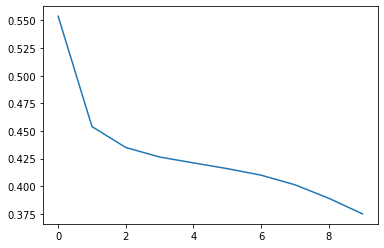

In [92]:
plt.plot(history.history['loss'])

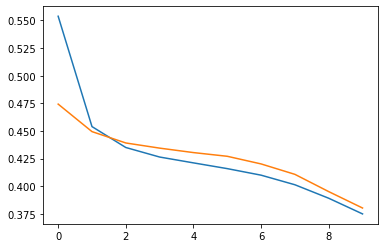

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

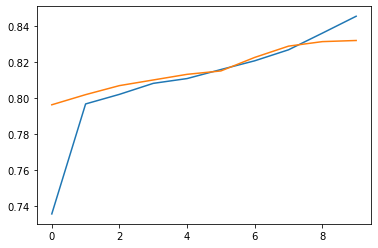

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [103]:
from sklearn.linear_model import LinearRegression

model_3 = LinearRegression()
model_3.fit(xtrain_scaled,ytrain)

y_pred = model.predict(xtest)
model.score(xtest,ytest)*100

16.048017258849654

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE;",mean_absolute_error(ytest,y_pred))
print("MSE;",mean_squared_error(ytest,y_pred))
print("RMSE;",np.sqrt(mean_squared_error(ytest,y_pred,squared=False)))


MAE; 0.2887643162897326
MSE; 0.14311798209780346
RMSE; 0.6150685925376317
